In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path_df = "C:/Users/fbbou/Desktop/DOCUMENT/OpenClassrooms/Parcour DATA_SCIENTIST/P7/home-credit-default-risk/"

In [4]:
df_bur = pd.read_csv(path_df +"bureau.csv")
df_bur

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [11]:
monthly = df_bur["SK_ID_CURR"].value_counts()
print(min(monthly),max(monthly))

1 116


In [16]:
df_bur["CREDIT_ACTIVE"].value_counts()

CREDIT_ACTIVE
Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: count, dtype: int64

In [17]:
df_bur = df_bur[df_bur["CREDIT_ACTIVE"]=="Active"]

In [18]:
df_bur.shape

(630607, 17)

In [20]:
gb_n = df_bur.groupby('SK_ID_CURR')['DAYS_CREDIT'].agg(['count','max'])
gb_s = df_bur.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].agg(['sum'])

In [21]:
gb_n

,count,max
SK_ID_CURR,,
100001,3,-49
100002,2,-103
100003,1,-606
100005,2,-62
100008,1,-78
...,...,...
456247,3,-309
456249,2,-483
456250,2,-760


In [22]:
gb_s

,sum
SK_ID_CURR,
100001,884025.000
100002,481988.565
100003,810000.000
100005,598626.000
100008,267606.000
...,...
456247,4113000.000
456249,405000.000
456250,2603110.050


In [23]:
df_bur = pd.read_csv(path_df +"bureau.csv")
gb_n = df_bur.groupby('SK_ID_CURR')['DAYS_CREDIT'].agg(['count','max'])
gb_s = df_bur.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].agg(['sum'])
gb=pd.concat([gb_s,gb_n],axis=1)
gb

,sum,count,max
SK_ID_CURR,,,
100001,884025.000,3,-49
100002,481988.565,2,-103
100003,810000.000,1,-606
100005,598626.000,2,-62
100008,267606.000,1,-78
...,...,...,...
456247,4113000.000,3,-309
456249,405000.000,2,-483
456250,2603110.050,2,-760


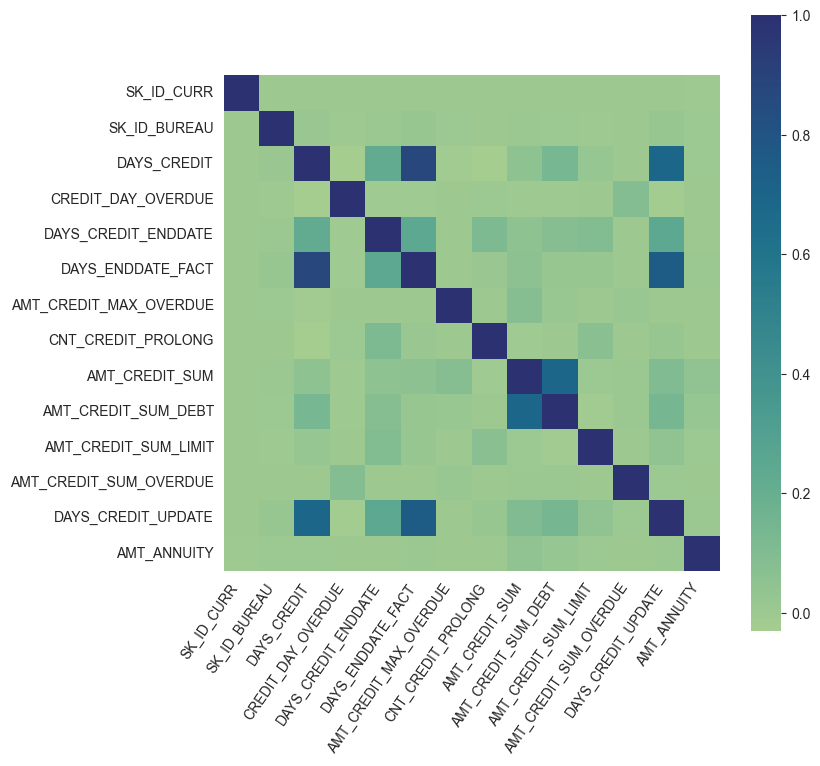

In [15]:
# Matrice de corrélation & heatmap
df_corr = df_bur.select_dtypes(include=['float', 'int'])
df_corr = df_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df_corr, annot=False,cmap="crest",square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=55, ha="right")
plt.show()